# Initialization

In [1]:
# Helper functions and common imports
import pandas as pd
from numpy import log10, sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def euclid(x, y, df, take_log=False):
    if take_log:
        return sqrt(sum((log10(df[x])-log10(df[y]))**2))
    else:
        return sqrt(sum((df[x]-df[y])**2))


In [2]:
# Retrieve the list of FigureData Objects.
from qian2011 import data; q11 = data()
from qian2011sqrt import data; q11sq = data()

# Get / Update Peppercorn estimates

In [3]:
# Generate Peppercorn estimates for every FigureData setup.
verb = 1

Table1 = pd.DataFrame()
for fig in q11:
    print(fig.name)
    fig.pepperargs['ddG_2'] = fig.pepperargs['default'].copy()
    fig.pepperargs['ddG_2']['ddG_bind']=2.0
    fig.pepperargs['seesaw']={'seesaw-rxns':'seesaw-T20', 'seesaw-conc':100e-9, 'utbr_species': True}
    fig.eval('default', verbose = verb)
    fig.eval('ddG_2', verbose = verb)
    fig.eval('seesaw', verbose = verb)
    for df in fig.get_dataframes():
        df['name']=fig.name# + '-' + df['pepperargs']
        #display(df)
        Table1 = Table1.append(df)

Qian2011-SF22
tmp/Qian2011-SF22-00: default
tmp/Qian2011-SF22-00: default
tmp/Qian2011-SF22-00: default
tmp/Qian2011-SF22-00: default
tmp/Qian2011-SF22-00: default
tmp/Qian2011-SF22-00: default
tmp/Qian2011-SF22-00: default
tmp/Qian2011-SF22-00: default
tmp/Qian2011-SF22-00: default
tmp/Qian2011-SF22-00: default
tmp/Qian2011-SF22-00: ddG_2
tmp/Qian2011-SF22-00: ddG_2
tmp/Qian2011-SF22-00: ddG_2
tmp/Qian2011-SF22-00: ddG_2
tmp/Qian2011-SF22-00: ddG_2
tmp/Qian2011-SF22-00: ddG_2
tmp/Qian2011-SF22-00: ddG_2
tmp/Qian2011-SF22-00: ddG_2
tmp/Qian2011-SF22-00: ddG_2
tmp/Qian2011-SF22-00: ddG_2
tmp/Qian2011-SF22-00: seesaw
tmp/Qian2011-SF22-00: seesaw
tmp/Qian2011-SF22-00: seesaw
tmp/Qian2011-SF22-00: seesaw
tmp/Qian2011-SF22-00: seesaw
tmp/Qian2011-SF22-00: seesaw
tmp/Qian2011-SF22-00: seesaw
tmp/Qian2011-SF22-00: seesaw
tmp/Qian2011-SF22-00: seesaw
tmp/Qian2011-SF22-00: seesaw
Qian2011-SF23
tmp/Qian2011-SF23-00: default
tmp/Qian2011-SF23-00: default
tmp/Qian2011-SF23-00: default
tmp/Qian2011

In [4]:
from os import remove
fig = q11[2]
print fig.name
print fig._enumerated
for ef in fig._enumerated:
    print ef
    #remove(ef)
#fig._enumerated = set()

Qian2011-F2C-OR
set(['tmp/Qian2011-F2C-OR-00-default-enum.pil', 'tmp/Qian2011-F2C-OR-00-seesaw-enum.pil', 'tmp/Qian2011-F2C-OR-00-ddG_2-enum.pil'])
tmp/Qian2011-F2C-OR-00-default-enum.pil
tmp/Qian2011-F2C-OR-00-seesaw-enum.pil
tmp/Qian2011-F2C-OR-00-ddG_2-enum.pil


# Seesaw sytems comparison

Figure(1224.6x360)


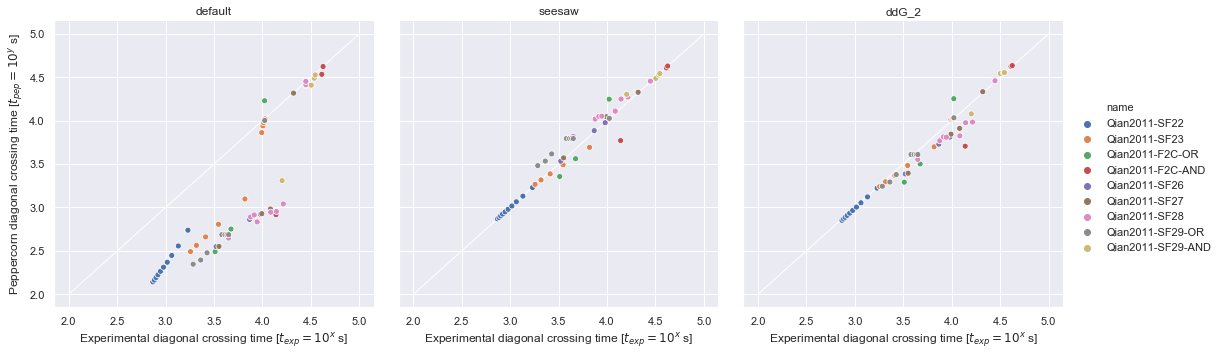

In [5]:
tmpfig = Table1.copy()
tmpfig['exp-time'] = log10(tmpfig['exp-time'])
tmpfig['sim-time'] = log10(tmpfig['sim-time'])
#tmpfig = tmpfig.loc[tmpfig['pepperargs'].isin(['seesaw'])]
#tmpfig = tmpfig.loc[tmpfig['name'].isin(['Qian2011-SF22', 'Qian2011-SF23'])]
#tmpfig = tmpfig.loc[tmpfig['name'].isin([fig.name for fig in z11])]
#tmpfig.reset_index(inplace=True, drop=True)
#tmpfig = tmpfig.iloc[0:-1]
#tmpfig = tmpfig.iloc[[4,5,6,7,28,29,30,31], :]
#display(tmpfig)


g = sns.relplot(x="exp-time", y="sim-time", hue='name', col="pepperargs", data=tmpfig, col_order=['default', 'seesaw', 'ddG_2'])
 
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(2, 5)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)

print plt.gcf()

for ax in plt.gcf().get_axes():
    #print(ax)
    ax.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)
    ax.set(xlabel='Experimental diagonal crossing time [$t_{exp} =10^x $ s]')
    
plt.gcf().get_axes()[0].set(ylabel='Peppercorn diagonal crossing time [$t_{pep} = 10^y $ s]')
g.set_titles(row_template="{row_name}", col_template="{col_name}")

plt.savefig('seesaw_times.pdf', bbox_inches='tight')
plt.savefig('seesaw_times.svg', bbox_inches='tight')


# Squareroot circuit

In [6]:
from qian2011sqrt import data; q11sqrt = data()


In [7]:
# Generate Peppercorn estimates for every FigureData setup.
verb = 1
#Table1 = pd.DataFrame()
for fig in q11sqrt:
    print(fig.name)
    fig.pepperargs['seesaw']={'seesaw-rxns':'seesaw-T25', 'seesaw-conc':50e-9, 'utbr_species': True}
    fig.pepperargs['ddG_2']=fig.pepperargs['default'].copy()
    fig.pepperargs['ddG_2']['ddG_bind']=2
    fig.eval('default', verbose = verb, cmpfig=True)
    fig.eval('seesaw', verbose = verb, cmpfig=True)
    fig.eval('ddG_2', verbose=verb, cmpfig=True)
    for df in fig.get_dataframes():
        df['name']=fig.name
        Table1 = Table1.append(df)

Qian2011-SF31
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: default
tmp/Qian2011-SF31-00: defa

In [8]:
#fig=q11sqrt[0]
#fig._enumerated = set(['tmp/Qian2011-SF31-00-CONDENSED-enum.pil'])
#fig._simulated = set(['tmp/Qian2011-SF31-00-CONDENSED-y1_0-1101-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1100-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0110-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0010-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0011-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1010-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0100-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0000-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0011-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0111-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1110-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0100-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0010-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0001-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1000-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1010-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1011-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1101-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0110-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0101-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0101-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1001-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1111-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1011-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1111-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0111-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1000-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-1001-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-0000-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1100-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_0-0001-simu', 'tmp/Qian2011-SF31-00-CONDENSED-y1_1-1110-simu'])
#fig._simexecs = set(['tmp/Qian2011-SF31-00-CONDENSED-simu.py'])

Figure(1224.6x360)


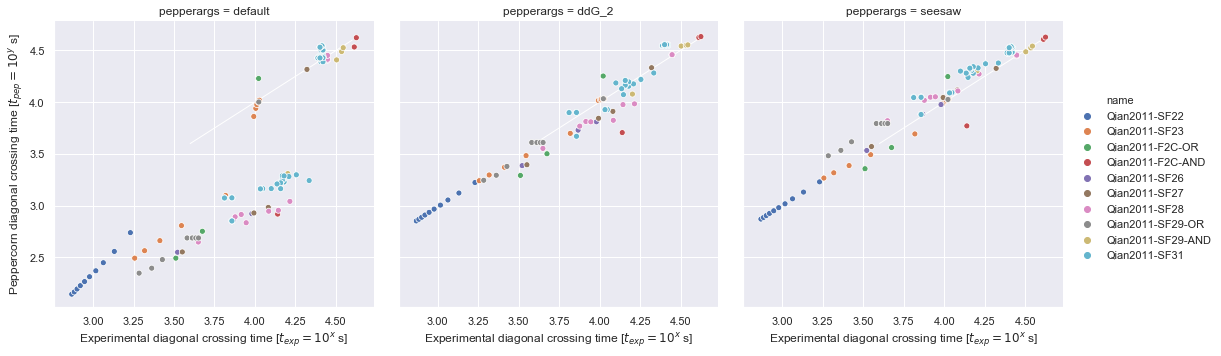

In [9]:
tmpfig = Table1.copy()
tmpfig['exp-time'] = log10(tmpfig['exp-time'])
tmpfig['sim-time'] = log10(tmpfig['sim-time'])
#print tmpfig['simulation'] 

#tmpfig = tmpfig.loc[tmpfig['pepperargs'].isin(['CONDENSED'])]
#tmpfig = tmpfig.loc[tmpfig['pepperargs'].isin(['ddG_2', 'seesaw'])]
#tmpfig = tmpfig.loc[tmpfig['reporter'].isin(['y1_0'])]
#tmpfig.reset_index(inplace=True, drop=True)
#tmpfig = tmpfig.iloc[0:-1]
#tmpfig = tmpfig.iloc[[4,5,6,7,28,29,30,31], :]
#display(tmpfig)

g = sns.relplot(x="exp-time", y="sim-time", hue='name', col="pepperargs", data=tmpfig)
 
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(3.6, 4.6)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)

print plt.gcf()

for ax in plt.gcf().get_axes():
    #print(ax)
    ax.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)
    ax.set(xlabel='Experimental diagonal crossing time [$t_{exp} =10^x $ s]')
    
plt.gcf().get_axes()[0].set(ylabel='Peppercorn diagonal crossing time [$t_{pep} = 10^y $ s]')
#g.set_titles(row_template="{row_name}", col_template="{col_name}")

plt.savefig('sqrt_times.pdf', bbox_inches='tight')
plt.savefig('sqrt_times.svg', bbox_inches='tight')

(-3, 53)

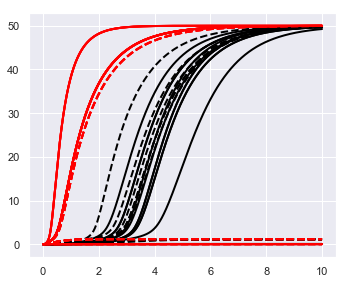

In [10]:
# Get Data from File
SQ = q11sqrt[0]
df = pd.read_table(SQ.cmpfig['ddG_2'], sep='\s+')
#df = pd.read_table(SQ.cmpfig['seesaw'], sep='\s+')

time = df.values[:,0]/3600
y1_0 = df.values[:,1:17]
y1_1 = df.values[:,17:33]
y2_0 = df.values[:,33:49]
y2_1 = df.values[:,49:]

#legend = ['20 nM', '6 nM', '2 nM', '1 nM', '0.6 nM', '0.4 nM', '0.2 nM', '0.1 nM', '0.06 nM', '0.02 nM', '0.01 nM', '0 nM']
legend = list(df)[1:]

#assert ys.shape[1] == len(legend)
plt.figure(figsize=(5.5,4.5))

# Plot the data
plt.plot(time, y1_0, color='black', linestyle='--')
plt.plot(time, y1_1, color='black')
plt.plot(time, y2_0, color='red', linestyle='--')
plt.plot(time, y2_1, color='red')

plt.xlim(-0.5,10.5)
#plt.xticks(np.arange(0, 21, step=5))

plt.ylim(-3,53)
#plt.yticks(np.arange(0, 21, step=5))

#plt.legend(legend, ncol=1, loc='center right', fontsize=7);
#plt.gca().set_xlabel('Time [min]', fontsize=10)
#plt.gca().set_ylabel('Concentration A [nM]', fontsize=10)
#plt.gca().axhline(y=10, linewidth=1, color='black', linestyle='--')
